In [1]:
import nibabel as nib
import numpy as np
from nilearn.masking import compute_epi_mask, compute_background_mask, compute_gray_matter_mask
from nilearn import plotting
import matplotlib.pyplot as plt
import SimpleITK as sitk
import glob, os
import numpy.ma as ma
import sys
import normalizationModule
import subprocess
import pdb
%matplotlib inline


In [2]:
num_input = 5
root_path = "./"
train_path = "datalist/train_list.txt"
train_file = open(train_path, 'r')
train_dir = train_file.readlines()

In [3]:
cut_coords = (-140, -120, 80)

def original_code():
    testf = open('./data_preprocessing/generate_mask/test.txt', 'r')
    test_dir = testf.readlines()
    for i in range(int(len(test_dir)/5)):
        print(i)
        direct,_ = test_dir[5*i].split("\n")    
        # read the images and ground truth
        images0 = nib.load('./'+direct+'.gz').get_data()
        images0 = np.expand_dims(images0, axis=0)

        direct1,_ = test_dir[5*i + 1].split("\n")    
        # read the images and ground truth
        images1 = nib.load('./'+direct1+'.gz').get_data()
        images1 = np.expand_dims(images1, axis=0)

        direct2,_ = test_dir[5*i + 2].split("\n")    
        # read the images and ground truth
        images2 = nib.load('./'+direct2+'.gz').get_data()
        images2 = np.expand_dims(images2, axis=0)

        direct3,_ = test_dir[5*i + 3].split("\n")    
        # read the images and ground truth
        images3 = nib.load('./'+direct3+'.gz').get_data()
        images3 = np.expand_dims(images3, axis=0)

        images = np.concatenate((images0, images1, images2, images3), axis=0)

        image = np.max(images, axis=0)
        image = np.swapaxes(image, 0, 2)
        image[image>0] =1
        image = image.astype(dtype=np.uint8)
        if not os.path.exists(direct):
            os.makedirs(direct)
        image = sitk.GetImageFromArray(image)
        sitk.WriteImage(image, direct + "/mask-test.nii.gz")
        print("showing generated mask")
        plotting.plot_img(direct + "/mask-test.nii.gz", cut_coords=cut_coords)
        plotting.show()
        print("showing mask from given subset of dataset")
        plotting.plot_img(direct + "/mask.nii.gz", cut_coords=cut_coords)
        plotting.show()
# original_code()
        

def generate_mask(filepath):
    im = nib.load(filepath).get_data()
#     print(im.shape)
    im = np.expand_dims(im, axis=0)
#     print(im.shape)
    images = np.concatenate((im, im, im, im), axis=0)
    
    image = np.max(images, axis=0)
#     image = np.swapaxes(image, 0, 2)
    image[image>0] =1
    image = image.astype(dtype=np.uint8)
    print(image.shape)
    image = sitk.GetImageFromArray(image)
    sitk.WriteImage(image, "test-mask.nii.gz")
    plotting.plot_img("test-mask.nii.gz")
    
def stack_images_and_generate_mask():
    for i in range(int(len(train_dir)/5)):
        print(i)
        direct,_ = train_dir[5*i].split("\n")    
        # read the images and ground truth
        images0 = nib.load('./'+direct+'.gz').get_data()
        images0 = np.expand_dims(images0, axis=0)

        direct1,_ = train_dir[5*i + 1].split("\n")    
        # read the images and ground truth
        images1 = nib.load('./'+direct1+'.gz').get_data()
        images1 = np.expand_dims(images1, axis=0)

        direct2,_ = train_dir[5*i + 2].split("\n")    
        # read the images and ground truth
        images2 = nib.load('./'+direct2+'.gz').get_data()
        images2 = np.expand_dims(images2, axis=0)

        direct3,_ = train_dir[5*i + 3].split("\n")    
        # read the images and ground truth
        images3 = nib.load('./'+direct3+'.gz').get_data()
        images3 = np.expand_dims(images3, axis=0)

        images = np.concatenate((images0, images1, images2, images3), axis=0)

        image = np.max(images, axis=0)
        print(image.shape)
#         im = nib.load('./'+direct+'.gz')#.get_data()
#         mask = ma.masked_where(im > 0, im)# compute_background_mask(image, border_size=1)
#         mask = compute_background_mask(im, border_size=1)
#         plotting.plot_img(compute_background_mask(im, border_size=1))
#         return
        image = np.swapaxes(image, 0, 2)
        image[image>0] =1
        image = image.astype(dtype=np.uint8)
        image = sitk.GetImageFromArray(image)
        sitk.WriteImage(image, "test-image.nii.gz")
        im_nifti = nib.load("test-image.nii.gz")
#         mask = compute_background_mask(im_nifti, border_size=1)
#         mask = sitk.GetImageFromArray(mask)
        
#         print(im_nifti.type)
#         print(mask.type)
#         plotting.plot_img(mask)
        plotting.plot_img(im_nifti)
        plotting.show()
#         return
#         sitk.WriteImage(mask, "test-mask.nii.gz")
#         plotting.plot_img("test-mask.nii.gz")
#         plotting.show()
#         break
#         return
# stack_images_and_generate_mask()
def visualize_masks():
    for idx in range(len(train_dir)):
        for i in range(num_input):
            if i < num_input - 1:
            
                direct, _ = train_dir[num_input * idx + i].split("\n")
                image = nib.load(root_path + direct + '.gz').get_data()

                if i == 0:

#                     plotting.plot_img(root_path + direct + "/mask-test.nii.gz")
#                     print("showing mask from code")

                    print("showing original mask")
                    plotting.plot_img(root_path + direct + "/mask.nii.gz", cut_coords=cut_coords)

#                     mask = nib.load(root_path + direct + "/mask.nii.gz").get_data()
    #                 plt.show(mask)
#                     print(mask.shape)
#                     print(root_path + direct + '.gz')
                    mask_image1 = compute_epi_mask(root_path + direct + '.gz')
                    print("showing epi mask")
                    plotting.plot_img(mask_image1)
                    mask_image2 = compute_background_mask(root_path + direct + '.gz', border_size=0)
                    print("showing background mask")
                    plotting.plot_img(mask_image2, cut_coords=cut_coords)
#                     mask_image3 = compute_gray_matter_mask(root_path + direct + '.gz')
#                     plotting.plot_img(mask_image3)
#                     newmask = generate_mask(root_path + direct + '.gz')
                    plotting.show()
#                     print("showing new mask")
# #                     mask = nib.load(root_path + direct + "/mask-test.nii.gz").get_data()
#                     plotting.plot_img(root_path + direct + "/mask-test.nii.gz")

    #                 print(mask.shape)
                
                    break
                break
            break
# def generate_mask(fpath):
    
# visualize_masks()



In [4]:

# there should be 881 HGG file names and 216 LGG file names.
def write_files_to_list_mha():
    HGG_directory = "/data2/brats2015/BRATS2015_Training/HGG"
    LGG_directory = "/data2/brats2015/BRATS2015_Training/LGG"
    HGG_dirs = next(os.walk(HGG_directory))[1]
    LGG_dirs = next(os.walk(LGG_directory))[1]
    f = open("brats2015mha_list.txt", "w")
    HGG_count = 0
    for d in sorted(HGG_dirs):
        full_path = HGG_directory + "/" +  d
        print(full_path)
        for p in sorted(next(os.walk(full_path))[1]):
            brain_path = full_path + "/" + p
#             print(brain_path)
    #         print(next(os.walk(brain_path)))
            for b in sorted(next(os.walk(brain_path))[2]):
                if b.endswith('.mha') and 'more' not in b:
#                     print(brain_path+"/"+b)

                    f.write(brain_path + "/" + b + "\n")
                    HGG_count += 1
    LGG_count = 0
    for d in sorted(LGG_dirs):
        full_path = LGG_directory + "/" +  d
        for p in sorted(next(os.walk(full_path))[1]):
            brain_path = full_path + "/" + p
            for b in sorted(next(os.walk(brain_path))[2]):
                if b.endswith('.mha') and 'more' not in b:
#                     print(brain_path+"/"+b)
                    f.write(brain_path + "/" + b + "\n")
                    LGG_count += 1
    print("wrote %d HGG file names and %d LGG file names" % (HGG_count, LGG_count))
    f.close()
    #         for file in os.walk((full_path + "/" + p + "*.mha"):
    #             print(file)
# write_files_to_list_mha()

def write_files_to_list_nii():
    mha_f = open('brats2015mha_list.txt', 'r')
    mha_files = mha_f.readlines()
    mha_f.close()
    assert len(mha_files) == 881+216
    
    nii_f = open('brats2015nii_list.txt', 'w')
    count = 0
    for i in range(len(mha_files)):
        new_filepath = mha_files[i].replace(".mha", ".nii").replace("brats2015", "brats2015_converted")
        print(new_filepath)
        nii_f.write(new_filepath)
#         print(mha_files[i])
        count += 1
    assert count == 881+216
    nii_f.close()
    print("Done")
# write_files_to_list_nii()
        
def convert_to_nii():
    data_mha = open('brats2015mha_list.txt', 'r')
    mha_dir = data_mha.readlines()
    data_mha.close()
    print(len(mha_dir))
    print(mha_dir)
#     data_nii = open('data_nii.txt', 'r')
#     nii_dir = data_nii.readlines()

    for i in range(len(mha_dir)):
#         break
        print(i)
        path, _ = mha_dir[i].split("\n")
        savepath = path.replace(".mha", ".nii.gz").replace("brats2015", "brats2015_converted")
        print(savepath)
        os.makedirs(os.path.dirname(savepath), exist_ok=True)

#         print(savepath)
        img = sitk.ReadImage(path)
        sitk.WriteImage(img, savepath)
    print("done")
# convert_to_nii()



In [ ]:
cut_coords = (-140, -120, 80)
def original_code_generate_masks_on_full_dataset():
    skip = 4
    testf = open('brats2015nii_list.txt', 'r')
    test_dir = testf.readlines()
    for i in range(int(len(test_dir)/5)):
        print(i)
        direct,_ = test_dir[skip*i].split("\n")    
        # read the images and ground truth
#         images0 = nib.load(direct).get_data()
        images0 = nib.load(direct+'.gz').get_data()
        images0 = np.expand_dims(images0, axis=0)

        direct1,_ = test_dir[skip*i + 1].split("\n")    
        # read the images and ground truth
#         images1 = nib.load(direct1).get_data()
        images1 = nib.load(direct1+'.gz').get_data()
        images1 = np.expand_dims(images1, axis=0)

        direct2,_ = test_dir[skip*i + 2].split("\n")    
        # read the images and ground truth
#         images2 = nib.load(direct2).get_data()
        images2 = nib.load(direct2+'.gz').get_data()
        images2 = np.expand_dims(images2, axis=0)

        direct3,_ = test_dir[skip*i + 3].split("\n")    
        # read the images and ground truth
#         images3 = nib.load(direct3).get_data()
        images3 = nib.load(direct3+'.gz').get_data()
        images3 = np.expand_dims(images3, axis=0)

        images = np.concatenate((images0, images1, images2, images3), axis=0)

        image = np.max(images, axis=0)
        image = np.swapaxes(image, 0, 2)
        image[image>0] =1
        image = image.astype(dtype=np.uint8)
        if not os.path.exists(direct):
            os.makedirs(direct)
        image = sitk.GetImageFromArray(image)
        sitk.WriteImage(image, direct + "/mask.nii.gz")
        print(direct + "/mask.nii.gz")
        print("showing generated mask")
        plotting.plot_img(direct + "/mask.nii.gz", cut_coords=cut_coords)
        plotting.show()
        try:
            print("showing mask from given subset of dataset")
            example_mask = "./" + direct[46:] + "/mask.nii.gz"
#             print(example_mask)
            plotting.plot_img(example_mask, cut_coords=cut_coords)
            plotting.show()
        except:
            pass
#         break
    print("DONE")
# original_code_generate_masks_on_full_dataset()

In [ ]:


# testf = open('test.txt', 'r')
# test_dir = testf.readlines()

# for i in range(int(len(test_dir))):
#     i = i + 1
#     print("image" + str(i))
	
#     if i % 5 == 4:
#         continue

#     direct_mask,_ = test_dir[5 * int(i/5)].split("\n")    
#     direct_image,_ = test_dir[i].split("\n")    
#     direct_mask = direct_mask + "/mask.nii.gz"
#     direct_image = direct_image +".gz"
    
#     pathToMainFolderWithSubjects = "./HGG/"
#     subjectsToProcess = os.listdir(pathToMainFolderWithSubjects)
#     subjectsToProcess.sort()
 
#     saveOutput = True
#     prefixToAddToOutp = "_zNorm2StdsMu"
     
#     dtypeToSaveOutput = "float32"
#     saveNormalizationPlots = True
         

#     lowHighCutoffPercentile = [5., 95.]
#     lowHighCutoffTimesTheStd = [3., 3.]
#     cutoffAtWholeImgMean = True 
# #     pdb.set_trace()
#     path = "/data2/arissa/Autofocus-Layer/data_preprocessing/data_normalization/generate_normal.py"
#     normalizationModule.do_normalization( __file__,
# 				pathToMainFolderWithSubjects,
# 				subjectsToProcess,
# 				direct_image,direct_mask,				
# 				saveOutput,
# 				prefixToAddToOutp,				
# 				dtypeToSaveOutput,
# 				saveNormalizationPlots,								
# 				lowHighCutoffPercentile, # Can be None
# 				lowHighCutoffTimesTheStd, # Can be None
# 				cutoffAtWholeImgMean,
# 				)



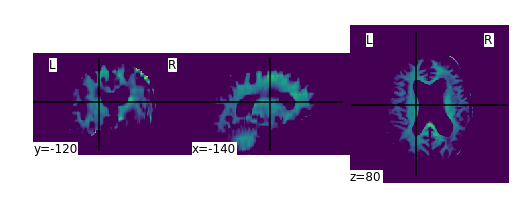

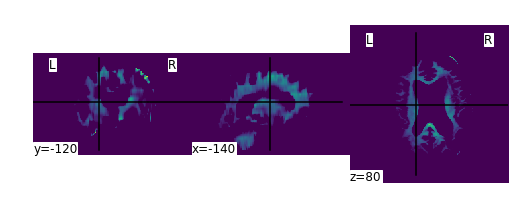

In [7]:
def view_normalized():
    impath = "./HGG/brats_tcia_pat200_0210/VSD.Brain.XX.O.MR_T1.40898/VSD.Brain.XX.O.MR_T1.40898.nii.gz"
    normalized_path = "./HGG/brats_tcia_pat200_0210/VSD.Brain.XX.O.MR_T1.40898/VSD.Brain.XX.O.MR_T1.40898_normalized.nii.gz"
    plotting.plot_img(impath, cut_coords=cut_coords)
    plotting.show()

    plotting.plot_img(normalized_path, cut_coords=cut_coords)
    plotting.show()
view_normalized()
    